In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
df = pd.read_csv("../Dataset/train.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [31]:
test_df=pd.read_csv("../Dataset/test.csv")
test_df.head()

,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,c,f,f,f,c,b,b,...,k,w,w,p,w,o,e,w,v,m
1,1,b,f,n,t,l,f,c,b,n,...,y,c,w,p,w,t,e,w,s,g
2,2,f,f,n,f,n,f,w,n,u,...,s,w,w,p,w,o,e,w,n,d
3,3,x,y,p,f,s,f,c,b,p,...,s,w,w,p,w,t,e,n,v,p
4,4,f,y,y,f,l,f,w,b,b,...,s,o,w,p,w,o,e,n,v,d


In [32]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [33]:
df.shape


(8124, 23)

In [34]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [35]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

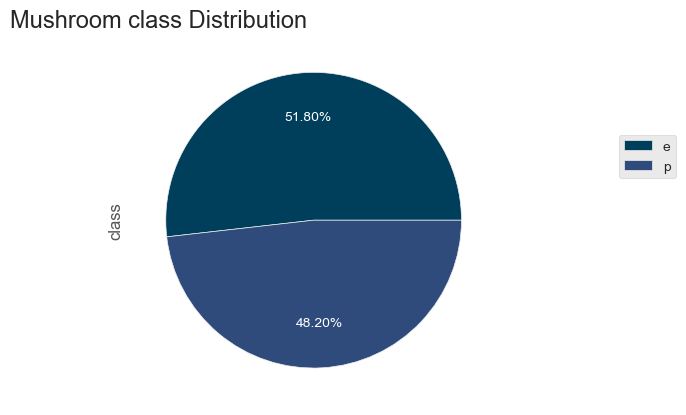

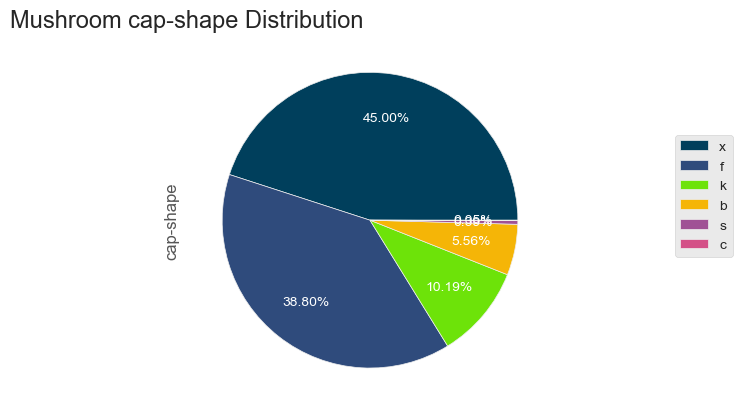

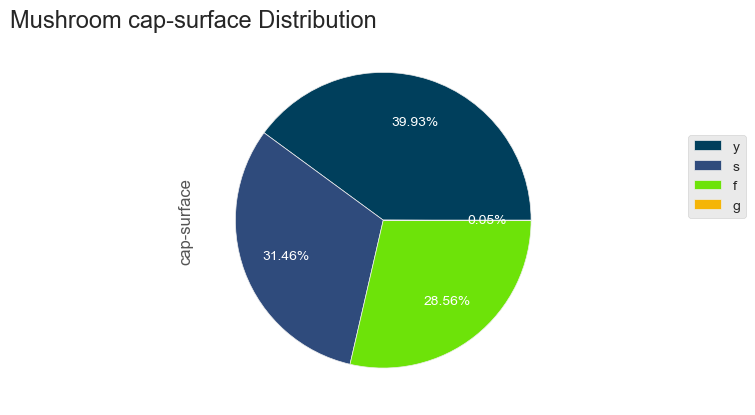

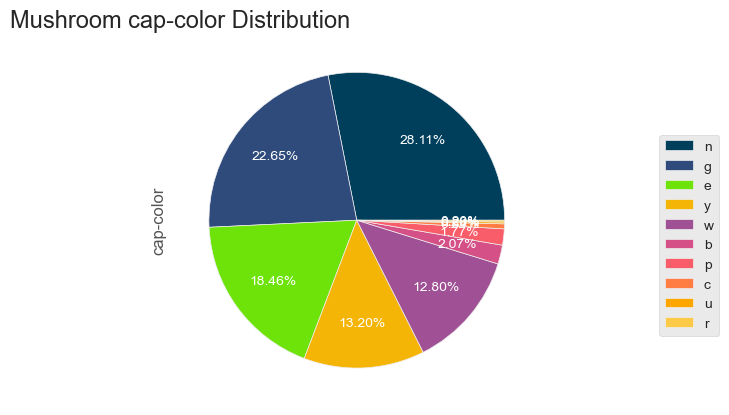

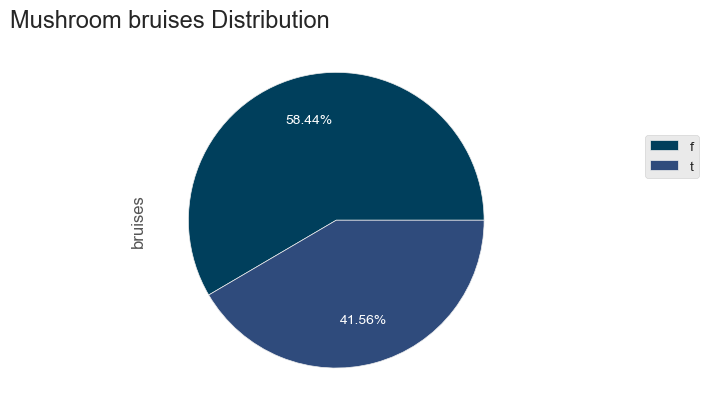

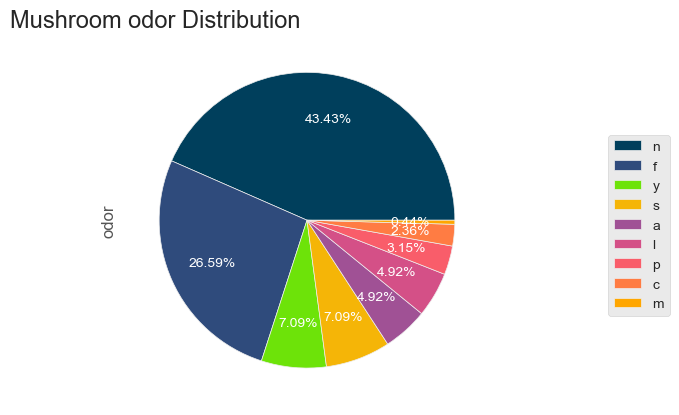

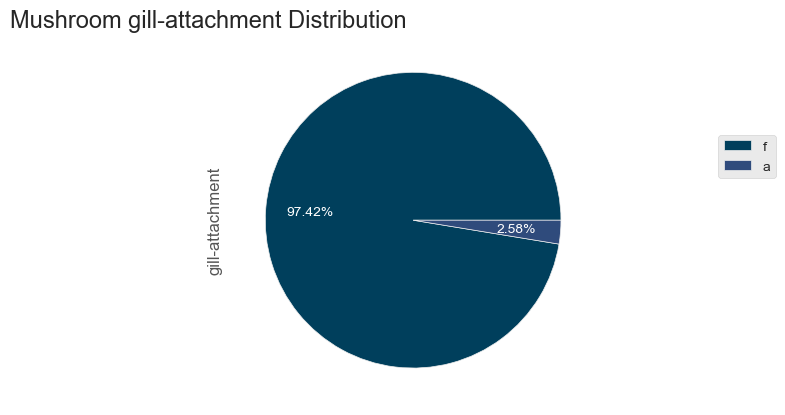

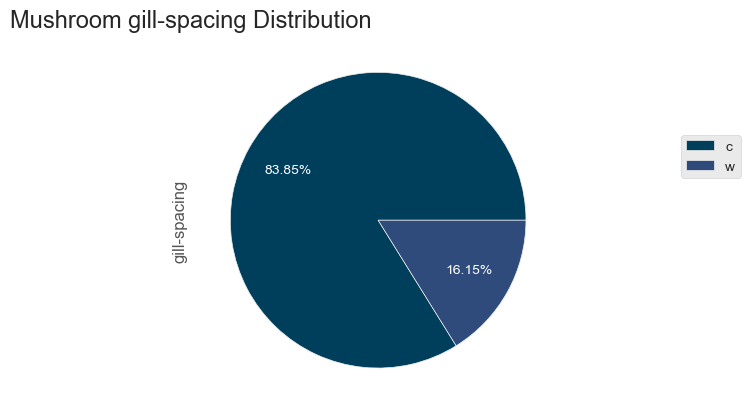

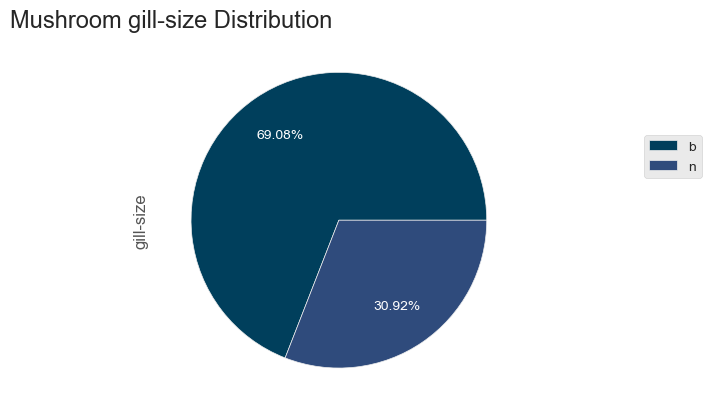

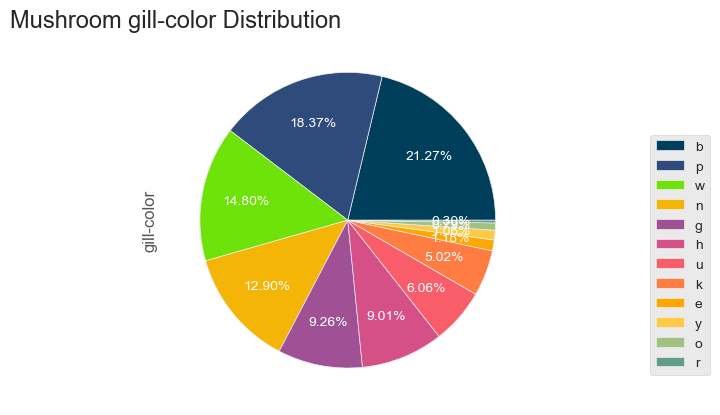

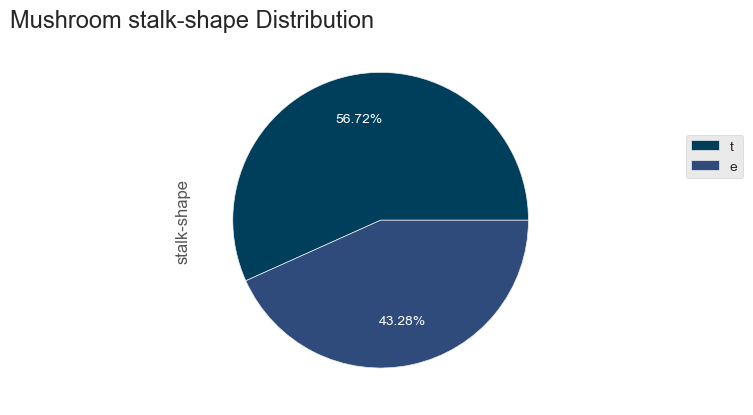

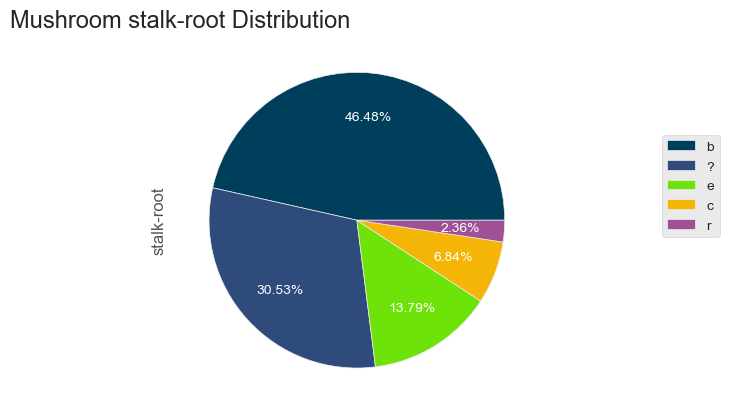

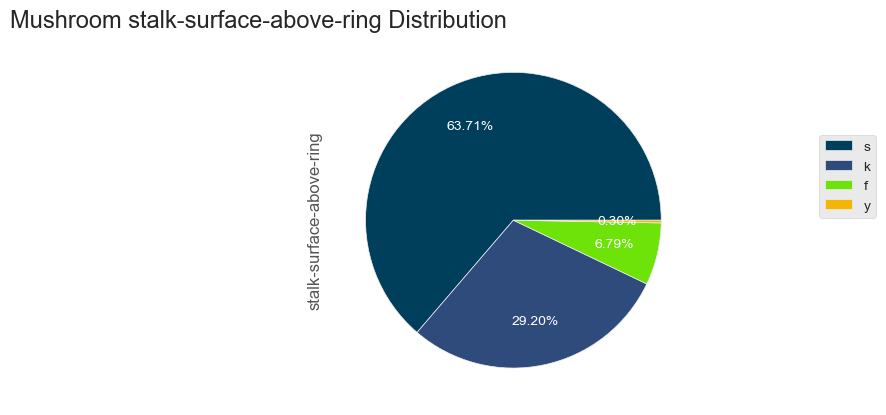

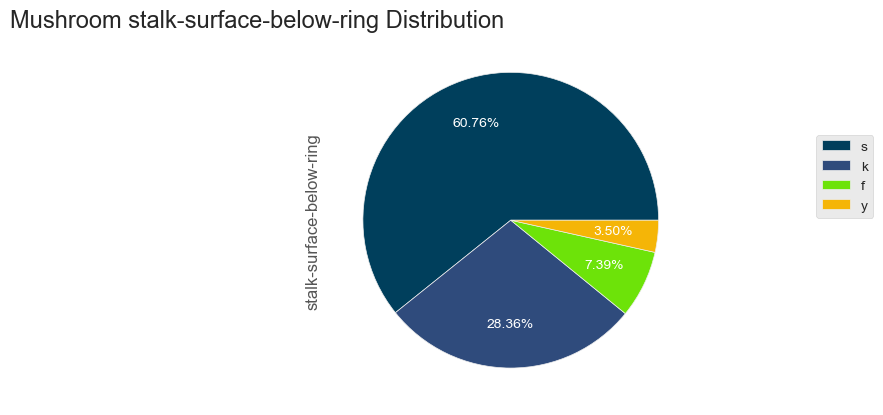

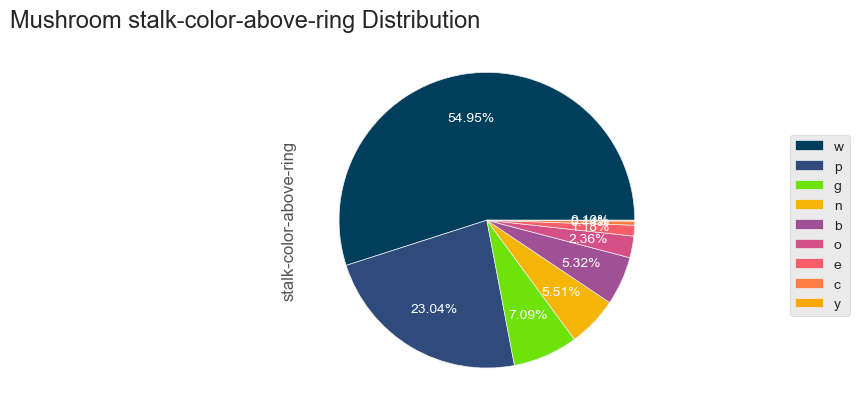

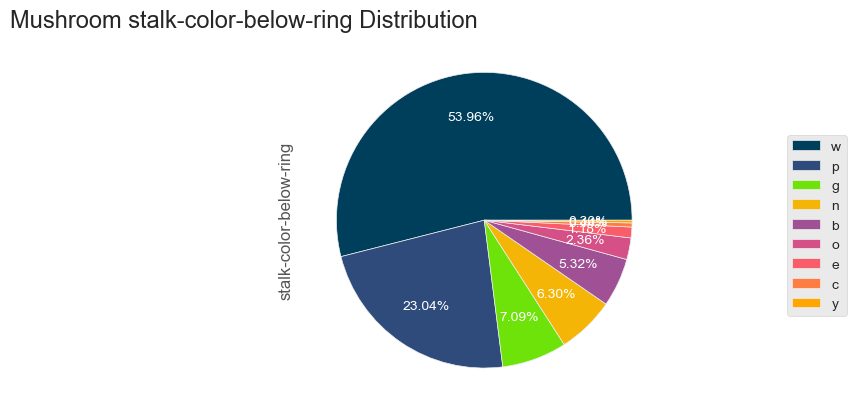

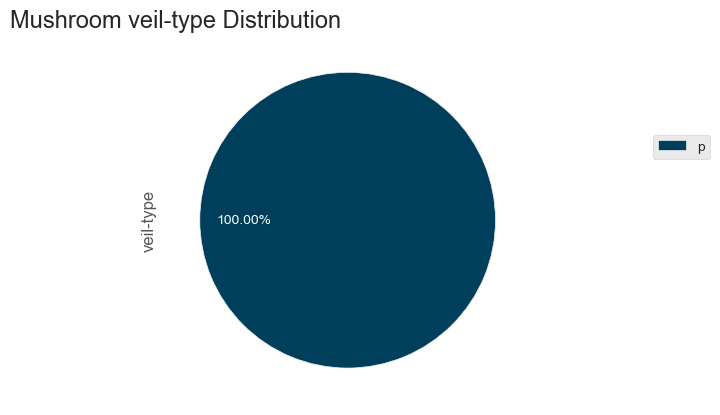

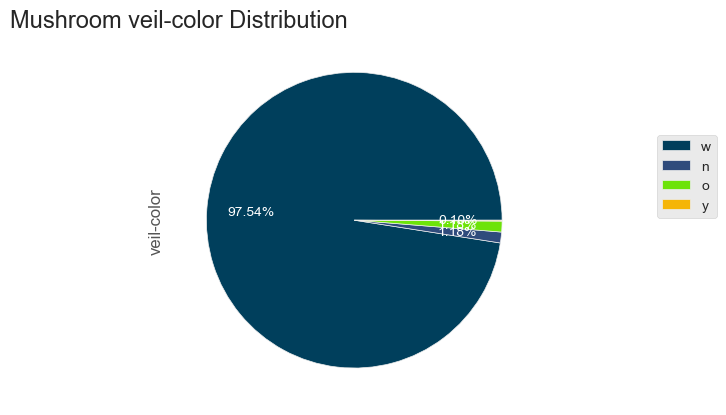

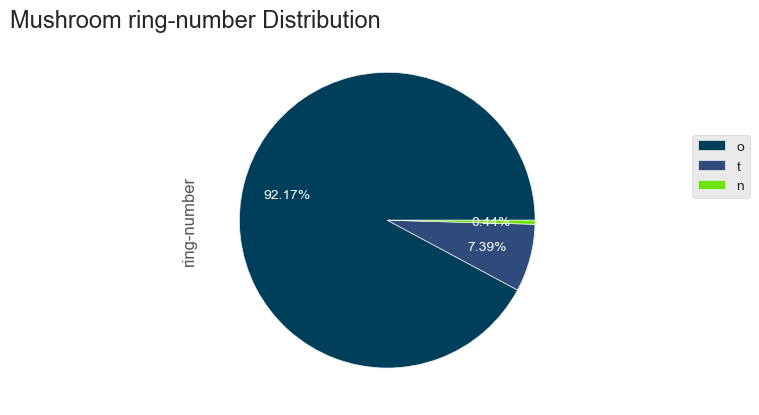

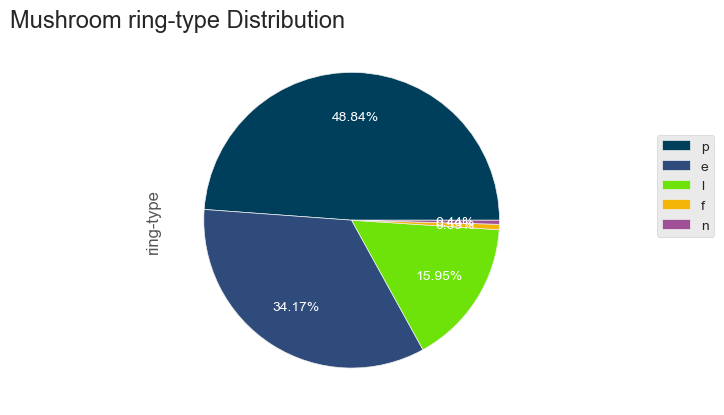

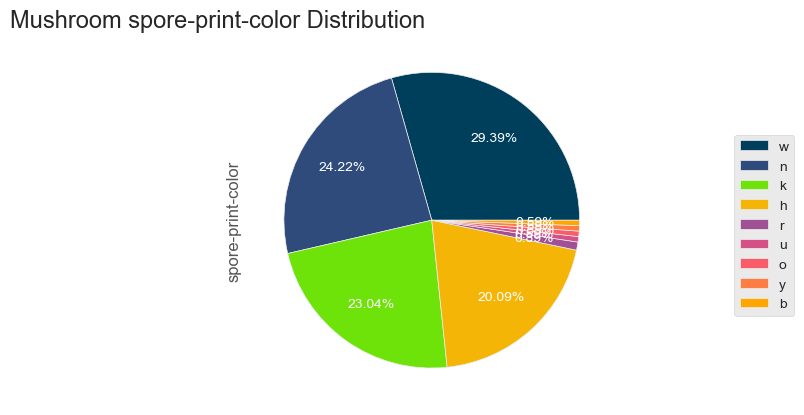

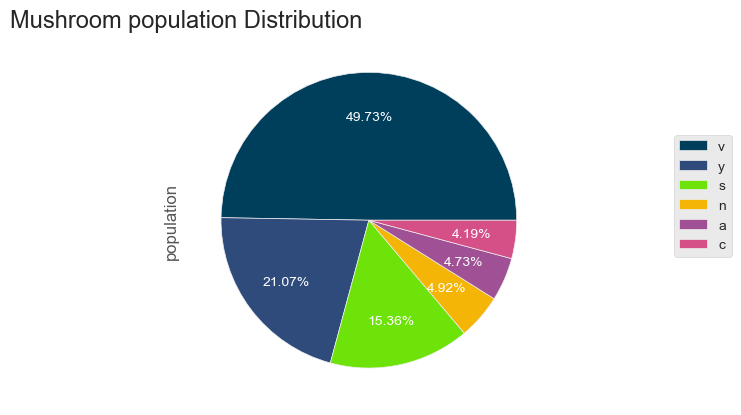

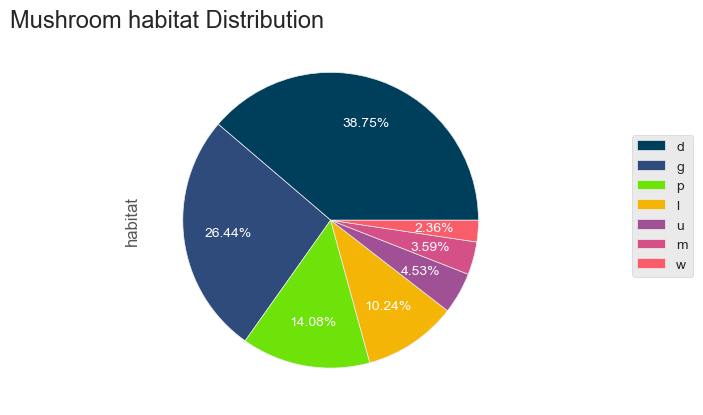

In [36]:
colors= ['#003f5c','#2f4b7c','#6de309','#f5b507','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#fcca46','#a1c181','#619b8a','#15e8aa']
for i in df.columns:
    plt.figure()
    df[i].value_counts().plot.pie(textprops={'color':"w"},pctdistance=0.7,autopct='%.2f%%',colors=colors, figsize=(5,5),labels=None,subplots=True)
    plt.title("Mushroom {} Distribution ".format(i),fontsize=17,ha='right')
    plt.legend(labels=df[i].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()

In [37]:
df['class'] = df['class'].replace({'e':1,'p':0})

In [38]:
df.head(2)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [39]:
X = df.iloc[:,1:]
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
y = df['class'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [63]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]

model = Sequential()
model.add(layers.Dense(10,input_shape=(X_train.shape[1],), input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

KeyError: 1

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                960       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, y_train,
                    epochs= 30,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

In [54]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  1.0000


In [55]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

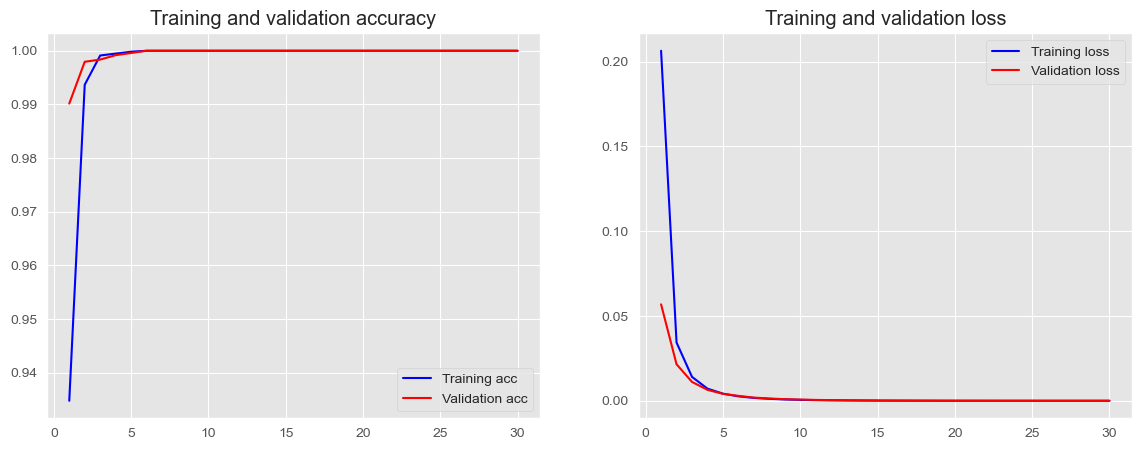

In [56]:
plot_history(history)


In [57]:
Test_p= test_df.copy()
Test_p.drop(['index'],axis=1,inplace=True)

In [58]:
Test_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 2000 non-null   object
 1   cap-surface               2000 non-null   object
 2   cap-color                 2000 non-null   object
 3   bruises                   2000 non-null   object
 4   odor                      2000 non-null   object
 5   gill-attachment           2000 non-null   object
 6   gill-spacing              2000 non-null   object
 7   gill-size                 2000 non-null   object
 8   gill-color                2000 non-null   object
 9   stalk-shape               2000 non-null   object
 10  stalk-root                2000 non-null   object
 11  stalk-surface-above-ring  2000 non-null   object
 12  stalk-surface-below-ring  2000 non-null   object
 13  stalk-color-above-ring    2000 non-null   object
 14  stalk-color-below-ring  

In [59]:
Test_p.shape

(2000, 22)

In [62]:
y_pred = model.predict(Test_p[:1])


ValueError: in user code:

    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 95), found shape=(None, 22)
